In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Change this to your folder in Drive
folder_path = '/content/drive/MyDrive'

# List all files and folders in this directory
for item in os.listdir(folder_path):
    print(item)

Text.ttf
Heading.ttf
openal32.dll
sfml-system-d-2.dll
sfml-network-d-2.dll
sfml-audio-d-2.dll
sfml-window-d-2.dll
Getting started.pdf
AVG Cleaner
Untitled Jam.pdf
SFML Game Development.pdf
SFML Game Development.gdoc
Token-blue.png
Token-red.png
wood.jpg
Board0.png
EXE TO APK_v1.0_apkpure.com.apk
SFML - Draggable Image.exe
SFML - Draggable Image.ilk
SFML - Draggable Image.pdb
sfml-graphics-d-2.dll
Snake and Ladders
Adobe Scan May 13, 2021 (1).pdf
Adobe Scan May 13, 2021.pdf
Adhaar cards.pdf
Transaction Proof.pdf
16352871760533626743499533615877.jpg
16352875506042916220778637162614.jpg
Chemistry Module .gdoc
Google Keep Document.gdoc
Classroom
ROSHAN PRADHAN.docx
Holidays Framework Proposal.docx
Colab Notebooks
eth-transactions-2025-08-24.csv
random_forest_eta.pkl
random_forest_500.pkl


In [6]:
import os

folder_path = '/content/drive/MyDrive/eth-transactions-2025-08-24.csv'
files = os.listdir(folder_path)

print("Files in folder:", files)

Files in folder: ['2025-08-24.csv', '.~lock.2025-08-24.csv#']


In [7]:
data = pd.read_csv("/content/drive/MyDrive/eth-transactions-2025-08-24.csv/2025-08-24.csv")
#pd.set_option('display.max_rows', None)
data.head()

,timestamp_ms,hash,chain_id,from,to,value,nonce,gas,gas_price,gas_tip_cap,gas_fee_cap,data_size,data_4bytes,sources,included_at_block_height,included_block_timestamp_ms,inclusion_delay_ms,tx_type
0,1755993600065,0xd1d90f14efa1c1374327fcc00f63c58826ae4582360c...,1,0xb0999731f7c2581844658a9d2ced1be0077b7397,0x2ff99ee6b22aedaefd8fd12497e504b18983cb14,3649391139034393604,777,178008,3203962735,3000000000,3203962735,708,0xb9e9a5ef,NaN,23207221,1755993599000,-1065,2
1,1755993600276,0x4f8b4f254144ed5f0904edb7d129e034e414f3cb0365...,1,0x80dd6c3a76f3b7e55d7cc57851c0b14870ae5a56,0xa9c11ffe094ddb3f4dea30cfad6010ea84f1ddae,0,66,82510,351897682,43210,351897682,36,0x95ff44d5,NaN,23207221,1755993599000,-1276,2
2,1755993600326,0x5367aa63c5af5377ccee13b349ad1fc989eb57e2bf03...,1,0xcd1b5b2e6c1ff8b606cf4b5731e2f3361474c01b,0x8236a87084f8b84306f72007f36f2618a5634494,0,3580,35571,351897682,43210,351897682,36,0xeddd0d9c,NaN,23207221,1755993599000,-1326,2
3,1755993600373,0xf539d9b16cb75e29a41b34b9f205662e5134849210e1...,1,0x82e46a7354bfffe8aa4b417629eb2c56f0626506,0x8a78b010b523b10f76927b2f766f1d807574d014,1110618284635049,11,21000,175970446,175970446,175970446,0,NaN,NaN,23207221,1755993599000,-1373,0
4,1755993600381,0xae43f685135a297c4fa2ba486e6c9373ce1ec9e9f5d5...,1,0x7fbeae7a98ae1295271ebe3e9ff27f7592db5e55,0x4d3a449e3a14addcd8ff49ff3e5e6c80760fb68c,0,21,197067,211155893,43210,211155893,4,0x4ebd0b94,NaN,23207221,1755993599000,-1381,2


# Data Preprocessing

In [8]:
data.drop(axis=1, columns=["hash", "chain_id", "from", "to", "sources", "data_4bytes", "included_at_block_height"], inplace=True)
data.head()

,timestamp_ms,value,nonce,gas,gas_price,gas_tip_cap,gas_fee_cap,data_size,included_block_timestamp_ms,inclusion_delay_ms,tx_type
0,1755993600065,3649391139034393604,777,178008,3203962735,3000000000,3203962735,708,1755993599000,-1065,2
1,1755993600276,0,66,82510,351897682,43210,351897682,36,1755993599000,-1276,2
2,1755993600326,0,3580,35571,351897682,43210,351897682,36,1755993599000,-1326,2
3,1755993600373,1110618284635049,11,21000,175970446,175970446,175970446,0,1755993599000,-1373,0
4,1755993600381,0,21,197067,211155893,43210,211155893,4,1755993599000,-1381,2


## Ensure the dtype of data["value"] is not Object

In [9]:
data["value"] = pd.to_numeric(data["value"], errors="coerce").astype("Float64")
print(data["value"].dtype)

Float64


## Reorder the columns

In [10]:
cols = ["gas_price", "gas", "gas_tip_cap", "gas_fee_cap", "value", "nonce", "data_size", "tx_type", "timestamp_ms", "included_block_timestamp_ms", "inclusion_delay_ms"]
data = data[cols]
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,timestamp_ms,included_block_timestamp_ms,inclusion_delay_ms
0,3203962735,178008,3000000000,3203962735,3649391139034393600.0,777,708,2,1755993600065,1755993599000,-1065
1,351897682,82510,43210,351897682,0.0,66,36,2,1755993600276,1755993599000,-1276
2,351897682,35571,43210,351897682,0.0,3580,36,2,1755993600326,1755993599000,-1326
3,175970446,21000,175970446,175970446,1110618284635049.0,11,0,0,1755993600373,1755993599000,-1373
4,211155893,197067,43210,211155893,0.0,21,4,2,1755993600381,1755993599000,-1381


### Remove those rows where the `inclusion_delay_ms` is less than 0

In [11]:
data.drop(data[data["inclusion_delay_ms"] < 0].index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head(10)

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,timestamp_ms,included_block_timestamp_ms,inclusion_delay_ms
0,211155893,519687,43210,211155893,0.0,377,4292,2,1755993601494,1755993611000,9506
1,1750000000,34787,1000000000,1750000000,0.0,0,68,2,1755993601556,1755993611000,9444
2,2000000000,2000000,1000000000,2000000000,0.0,2650433,1956,2,1755993601590,1755993611000,9410
3,229146564,21000,1666323,229146564,88112532183450896.0,1962898,0,2,1755993601657,1755993611000,9343
4,212924239,275793,6452249,212924239,0.0,34,260,2,1755993601657,1755993611000,9343
5,212924239,275806,6452249,212924239,0.0,48,260,2,1755993601672,1755993611000,9328
6,2000000000,50000,200000000,2000000000,0.0,23543,68,2,1755993601709,1755993611000,9291
7,2000000000,50000,200000000,2000000000,0.0,48571,68,2,1755993601731,1755993611000,9269
8,2000000000,50000,200000000,2000000000,0.0,3,68,2,1755993601741,1755993611000,9259
9,2000000000,50000,200000000,2000000000,1003980544820857984.0,9,0,2,1755993601752,1755993611000,9248


### Rename the cols as per the paper

In [12]:
data.rename({'gas':"gas_limit"}, inplace=True) # didn't change the name, why??
data.head(), data.columns

(    gas_price      gas  gas_tip_cap  gas_fee_cap                value  \
 0   211155893   519687        43210    211155893                  0.0   
 1  1750000000    34787   1000000000   1750000000                  0.0   
 2  2000000000  2000000   1000000000   2000000000                  0.0   
 3   229146564    21000      1666323    229146564  88112532183450896.0   
 4   212924239   275793      6452249    212924239                  0.0   
 
      nonce  data_size  tx_type   timestamp_ms  included_block_timestamp_ms  \
 0      377       4292        2  1755993601494                1755993611000   
 1        0         68        2  1755993601556                1755993611000   
 2  2650433       1956        2  1755993601590                1755993611000   
 3  1962898          0        2  1755993601657                1755993611000   
 4       34        260        2  1755993601657                1755993611000   
 
    inclusion_delay_ms  
 0                9506  
 1                9444  
 2 

### columns in csv:
1. timestamp_ms: Time when the Tx initiated
2. Value: Value sent in Wei
3. Nonce: Makes the Tx wait until the previous nonce Tx is confirmed (**values need transformation**)
4. gas: gas limit => max amount of gas someone's willing to pay
5. gas_price: price per unit gas
6. gas_tip_cap:
7. gas_fee_cap:
8. data_size: ?
9. timestamp_ms: Tx first seen at
10. included_block_timestamp_ms: Tx first mined at
11. inclusion_delay_ms: Tx ETA (**y values**)

Here, `inclusion_delay_ms = included_block_timestamp_ms - timestamp_ms`

## timestamp_0
timestamp_0 is the time when the Tx is seen in the mempool. Here we are not provided with the exact  
timestamp_0, so we can calculate it approximately by the formula:  
<div style="padding-left:100px"> timestamp_0 = included_block_timestamp_ms − inclusion_delay_ms </div>

## timestamp_1
timestamp_1 is the time when the Tx was confirmed by the mining node

## timestamp_1 - timestamp_0 -> To Predict

### Remove the `timestamp_ms` and `included_block_timestamp_ms` cols, as we don't have that info during inferencing

In [13]:
data.drop(axis=1, columns=["timestamp_ms", "included_block_timestamp_ms"], inplace=True)
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
0,211155893,519687,43210,211155893,0.0,377,4292,2,9506
1,1750000000,34787,1000000000,1750000000,0.0,0,68,2,9444
2,2000000000,2000000,1000000000,2000000000,0.0,2650433,1956,2,9410
3,229146564,21000,1666323,229146564,88112532183450896.0,1962898,0,2,9343
4,212924239,275793,6452249,212924239,0.0,34,260,2,9343


# Exploratory Data Analysis

In [14]:
print(f"number of duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"number of duplicate rows: {data.duplicated().sum()}")

# counter = 0
# for i in range(data.shape[0]):
#     if counter <= 10 and data.iloc[i, :].equals(data.iloc[i+1, :]):
#         print(f"row={i}", data.iloc[i, :])
#         print('*'*100)
#         counter += 1
data.head()

number of duplicate rows: 16875
number of duplicate rows: 0


,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
0,211155893,519687,43210,211155893,0.0,377,4292,2,9506
1,1750000000,34787,1000000000,1750000000,0.0,0,68,2,9444
2,2000000000,2000000,1000000000,2000000000,0.0,2650433,1956,2,9410
3,229146564,21000,1666323,229146564,88112532183450896.0,1962898,0,2,9343
4,212924239,275793,6452249,212924239,0.0,34,260,2,9343


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gas_price,921796.0,25200067078.237957,88579610506.541046,0.0,315283913.75,1092769272.5,2924983343.0,6802721088435.0
gas,921796.0,333012.827428,1667557.947849,21000.0,21000.0,60000.0,200000.0,42624882.0
gas_tip_cap,921796.0,1105160226.707818,6564238294.139421,0.0,79000000.0,270447878.5,1975683877.0,1997780064924.0
gas_fee_cap,921796.0,25200067078.237957,88579610506.541046,0.0,315283913.75,1092769272.5,2924983343.0,6802721088435.0
value,921796.0,2564816894283640320.0,180085226049254359040.0,0.0,0.0,527333999174.0,12586168131635852.0,71956423000000003309568.0
nonce,921796.0,806950.880391,5073468.996022,0.0,7.0,112.0,48732.25,1000000001.0
data_size,921796.0,245.835304,1793.977655,0.0,0.0,32.0,68.0,130116.0
tx_type,921796.0,1.607716,0.82232,0.0,2.0,2.0,2.0,4.0
inclusion_delay_ms,921796.0,56130.176709,1241372.608587,0.0,2395.0,5974.0,9139.0,100945847.0


### Some rows have gas, gas_price,... = 0 (impossible)

In [16]:
print(f"Number of incorrect gas_price = {(data["gas_price"] <= 0).sum()}")
print(f"Number of incorrect gas = {(data["gas"] <= 0).sum()}")
print(f"Number of incorrect gas_tip_cap = {(data["gas_tip_cap"] <= 0).sum()}")
print(f"Number of incorrect gas_fee_cap = {(data["gas_fee_cap"] <= 0).sum()}")

Number of incorrect gas_price = 1
Number of incorrect gas = 0
Number of incorrect gas_tip_cap = 110
Number of incorrect gas_fee_cap = 1


In [17]:
data.drop(axis=0,
          index=data[
              (data["gas_price"] <= 0)
              | (data["gas"] <= 0)
              | (data["gas_tip_cap"] <= 0)
              | (data["gas_fee_cap"] <= 0)
          ].index, inplace=True)
print(f"Number of incorrect gas_price = {(data["gas_price"] <= 0).sum()}")
print(f"Number of incorrect gas = {(data["gas"] <= 0).sum()}")
print(f"Number of incorrect gas_tip_cap = {(data["gas_tip_cap"] <= 0).sum()}")
print(f"Number of incorrect gas_fee_cap = {(data["gas_fee_cap"] <= 0).sum()}")

Number of incorrect gas_price = 0
Number of incorrect gas = 0
Number of incorrect gas_tip_cap = 0
Number of incorrect gas_fee_cap = 0


In [18]:
data.shape

(921686, 9)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gas_price,921686.0,25202982514.124573,88584493758.53299,1.0,315303099.75,1093151215.5,2925773905.0,6802721088435.0
gas,921686.0,332940.913437,1667049.425017,21000.0,21000.0,60000.0,200000.0,42624882.0
gas_tip_cap,921686.0,1105292123.714974,6564618888.474798,1.0,79000000.0,270762573.0,1976965941.0,1997780064924.0
gas_fee_cap,921686.0,25202982514.124573,88584493758.53299,1.0,315303099.75,1093151215.5,2925773905.0,6802721088435.0
value,921686.0,2565120696920773632.0,180095969860350115840.0,0.0,0.0,534001976026.0,12589221538806534.0,71956423000000003309568.0
nonce,921686.0,807035.919154,5073763.207933,0.0,7.0,112.0,48740.0,1000000001.0
data_size,921686.0,245.844672,1794.081585,0.0,0.0,32.0,68.0,130116.0
tx_type,921686.0,1.607662,0.822342,0.0,2.0,2.0,2.0,4.0
inclusion_delay_ms,921686.0,56129.070304,1241437.805311,0.0,2396.0,5974.0,9139.0,100945847.0


### Need to Scale

In [20]:
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
0,211155893,519687,43210,211155893,0.0,377,4292,2,9506
1,1750000000,34787,1000000000,1750000000,0.0,0,68,2,9444
2,2000000000,2000000,1000000000,2000000000,0.0,2650433,1956,2,9410
3,229146564,21000,1666323,229146564,88112532183450896.0,1962898,0,2,9343
4,212924239,275793,6452249,212924239,0.0,34,260,2,9343


In [21]:
data["inclusion_delay_ms"]

,inclusion_delay_ms
0,9506
1,9444
2,9410
3,9343
4,9343
...,...
938666,11068
938667,11038
938668,11036
938669,11008


### Some features are heavily tailed: `value`, `gas_price`, `gas_tip_cap`, `gas_fee_cap`, `nonce`
-> Use the log scaling, then apply StandardScaler

### `gas`, `data_size`
-> Directly apply StandardScaler

### One-Hot Encode `tx_type`

In [22]:
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
0,211155893,519687,43210,211155893,0.0,377,4292,2,9506
1,1750000000,34787,1000000000,1750000000,0.0,0,68,2,9444
2,2000000000,2000000,1000000000,2000000000,0.0,2650433,1956,2,9410
3,229146564,21000,1666323,229146564,88112532183450896.0,1962898,0,2,9343
4,212924239,275793,6452249,212924239,0.0,34,260,2,9343


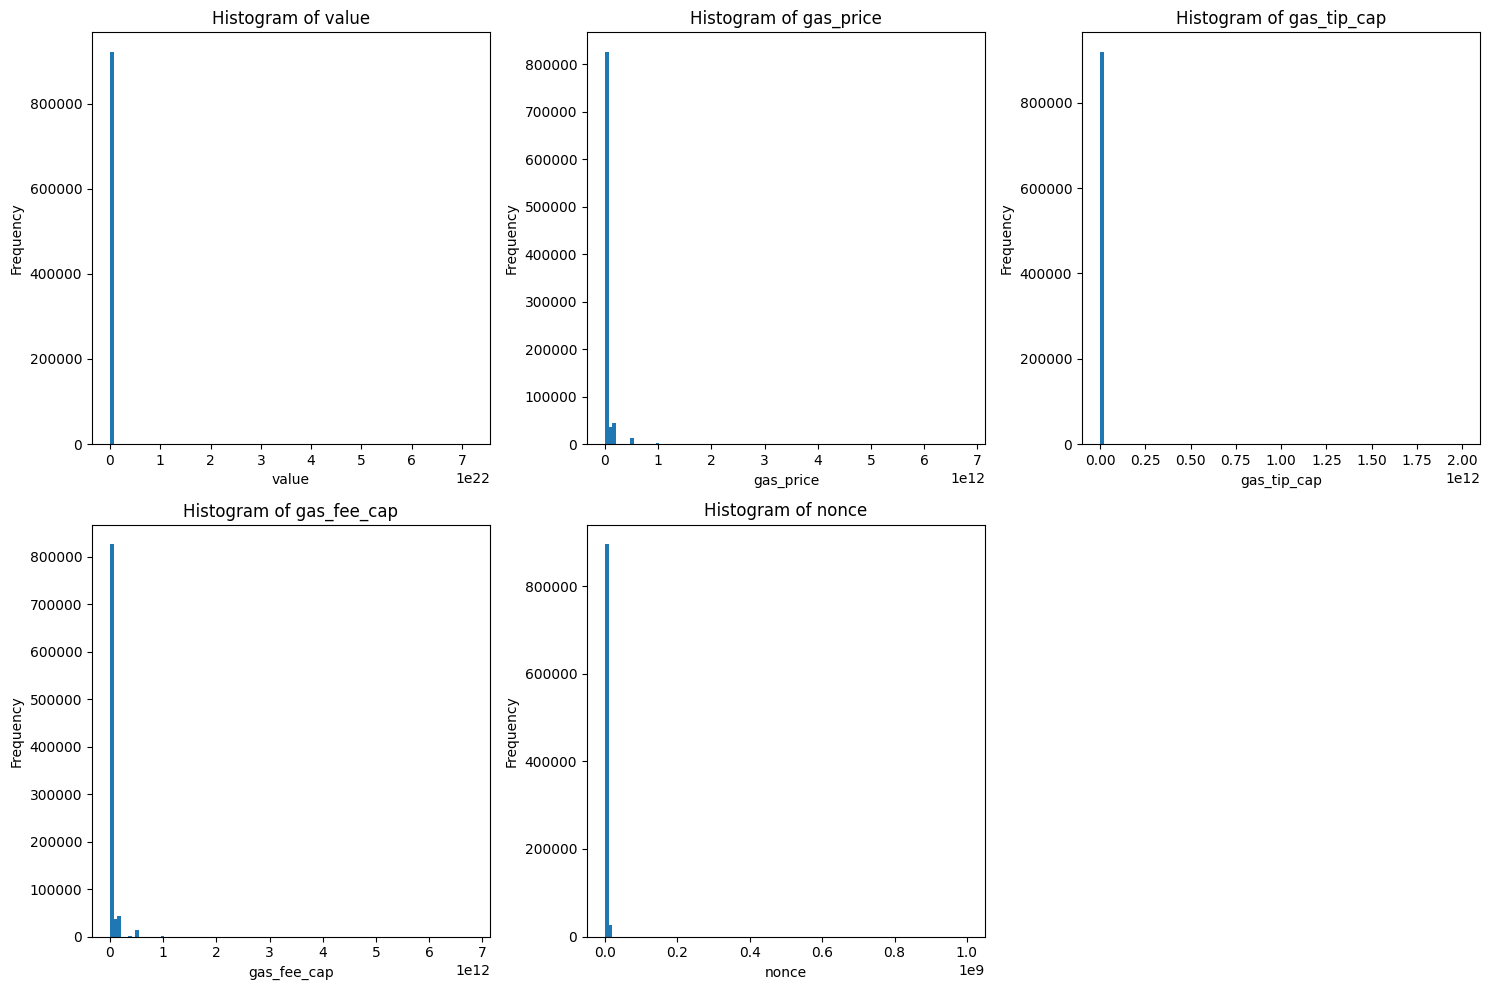

In [23]:
import matplotlib.pyplot as plt

# Plot histograms for the heavily tailed features without seaborn
features = ['value', 'gas_price', 'gas_tip_cap', 'gas_fee_cap', 'nonce']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[col].dropna(), bins=100)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [24]:
data[data["inclusion_delay_ms"] == data["inclusion_delay_ms"].max()]
# These transactions took the longest 27-28 hrs to be confirmed (why??)

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
1350,141000000,20000000,100000000,141000000,0.0,59,388,2,100945847
1353,141000000,20000000,100000000,141000000,0.0,58,388,2,100945847


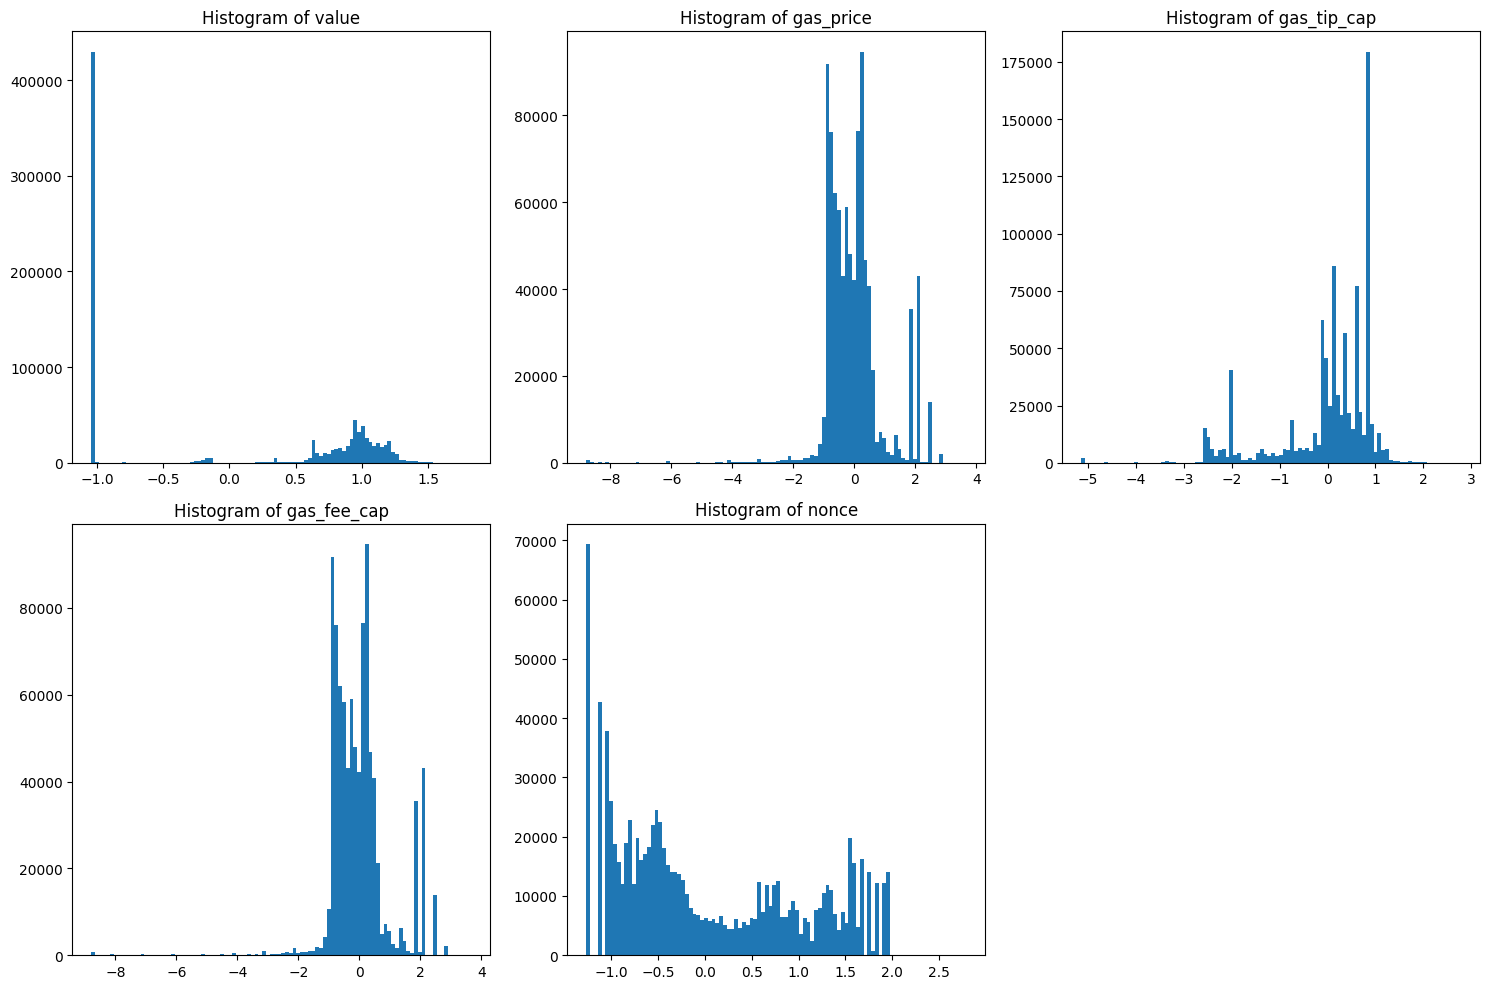

In [25]:
from sklearn.preprocessing import StandardScaler

features = ['value', 'gas_price', 'gas_tip_cap', 'gas_fee_cap', 'nonce']
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(features, 1):
    plt.subplot(2, 3, idx)
    data[feature] = np.log1p(data[feature])
    data[feature] = StandardScaler().fit_transform(data[feature].values.reshape(-1, 1))
    plt.hist(data[feature], bins=100)
    plt.title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()

In [26]:
data["gas"] = StandardScaler().fit_transform(data["gas"].values.reshape(-1, 1))
data["data_size"] = StandardScaler().fit_transform(data["data_size"].values.reshape(-1, 1))

In [27]:
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type,inclusion_delay_ms
0,-0.819574,0.112022,-2.277531,-0.819574,-1.041976,-0.105935,2.255281,2,9506
1,0.092729,-0.178851,0.605794,0.092729,-1.041976,-1.266760,-0.099129,2,9444
2,0.150334,1.000006,0.605794,0.150334,-1.041976,1.626109,0.953221,2,9410
3,-0.784301,-0.187122,-1.229638,-0.784301,1.083600,1.567372,-0.137031,2,9343
4,-0.815977,-0.034281,-0.841210,-0.815977,-1.041976,-0.571358,0.007890,2,9343


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gas_price,921686.0,1.533075e-15,1.000001e+00,-8.789583,-0.646612,-0.110264,0.314442,3.658410e+00
gas,921686.0,-8.017529e-18,1.000001e+00,-0.187122,-0.187122,-0.163727,-0.079746,2.536935e+01
gas_tip_cap,921686.0,-1.077063e-15,1.000001e+00,-5.141142,-0.122484,0.230936,0.801345,2.786286e+00
gas_fee_cap,921686.0,1.533075e-15,1.000001e+00,-8.789583,-0.646612,-0.110264,0.314442,3.658410e+00
value,921686.0,4.104358e-16,1.000001e+00,-1.041976,-1.041976,0.429121,0.977599,1.825202e+00
nonce,921686.0,-1.094639e-15,1.000001e+00,-1.266760,-0.860036,-0.342115,0.844527,2.786570e+00
data_size,921686.0,1.785442e-17,1.000001e+00,-0.137031,-0.137031,-0.119195,-0.099129,7.238814e+01
tx_type,921686.0,1.607662e+00,8.223419e-01,0.000000,2.000000,2.000000,2.000000,4.000000e+00
inclusion_delay_ms,921686.0,5.612907e+04,1.241438e+06,0.000000,2396.000000,5974.000000,9139.000000,1.009458e+08


In [29]:
data = pd.get_dummies(data, columns=["tx_type"], dtype=int)

In [30]:
data = data[[col_name for col_name in data.columns if col_name != 'inclusion_delay_ms'] + ['inclusion_delay_ms']]
data.head()

,gas_price,gas,gas_tip_cap,gas_fee_cap,value,nonce,data_size,tx_type_0,tx_type_1,tx_type_2,tx_type_3,tx_type_4,inclusion_delay_ms
0,-0.819574,0.112022,-2.277531,-0.819574,-1.041976,-0.105935,2.255281,0,0,1,0,0,9506
1,0.092729,-0.178851,0.605794,0.092729,-1.041976,-1.266760,-0.099129,0,0,1,0,0,9444
2,0.150334,1.000006,0.605794,0.150334,-1.041976,1.626109,0.953221,0,0,1,0,0,9410
3,-0.784301,-0.187122,-1.229638,-0.784301,1.083600,1.567372,-0.137031,0,0,1,0,0,9343
4,-0.815977,-0.034281,-0.841210,-0.815977,-1.041976,-0.571358,0.007890,0,0,1,0,0,9343


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gas_price,921686.0,1.533075e-15,1.000001e+00,-8.789583,-0.646612,-0.110264,0.314442,3.658410e+00
gas,921686.0,-8.017529e-18,1.000001e+00,-0.187122,-0.187122,-0.163727,-0.079746,2.536935e+01
gas_tip_cap,921686.0,-1.077063e-15,1.000001e+00,-5.141142,-0.122484,0.230936,0.801345,2.786286e+00
gas_fee_cap,921686.0,1.533075e-15,1.000001e+00,-8.789583,-0.646612,-0.110264,0.314442,3.658410e+00
value,921686.0,4.104358e-16,1.000001e+00,-1.041976,-1.041976,0.429121,0.977599,1.825202e+00
nonce,921686.0,-1.094639e-15,1.000001e+00,-1.266760,-0.860036,-0.342115,0.844527,2.786570e+00
data_size,921686.0,1.785442e-17,1.000001e+00,-0.137031,-0.137031,-0.119195,-0.099129,7.238814e+01
tx_type_0,921686.0,1.998490e-01,3.998869e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
tx_type_1,921686.0,8.581013e-03,9.223551e-02,0.000000,0.000000,0.000000,0.000000,1.000000e+00
tx_type_2,921686.0,7.787565e-01,4.150843e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00


In [32]:
data["inclusion_delay_ms"].describe().T

,inclusion_delay_ms
count,9.216860e+05
mean,5.612907e+04
std,1.241438e+06
min,0.000000e+00
25%,2.396000e+03
50%,5.974000e+03
75%,9.139000e+03
max,1.009458e+08


In [33]:
print(f"Before removing: {len(data[data["inclusion_delay_ms"] == 0])}")
data = data[data['inclusion_delay_ms'] != 0]
print(f"After removing: {len(data[data["inclusion_delay_ms"] == 0])}")

Before removing: 66935
After removing: 0


In [34]:
from sklearn.model_selection import train_test_split
y = data["inclusion_delay_ms"]
data = data.iloc[:, :-1]

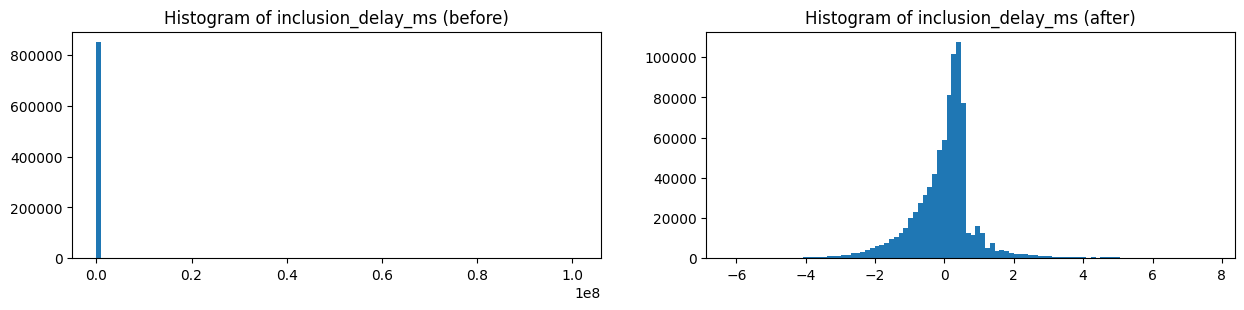

In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

feature = "inclusion_delay_ms"
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.hist(y, bins=100)
plt.title(f"Histogram of {feature} (before)")

y_log = np.log1p(y)
scaler_y = StandardScaler()
y_scaled = pd.Series(
    scaler_y.fit_transform(y_log.values.reshape(-1, 1)).ravel(),
    index=y.index,
    name=feature
)
plt.subplot(3, 2, 2)
plt.hist(y_scaled, bins=100)
plt.title(f"Histogram of {feature} (after)")

plt.show()

# Training -- Random Forest

In [36]:
type(y_scaled)

pandas.core.series.Series

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, y_scaled, test_size=0.2, random_state=42)

In [38]:
y_train

,inclusion_delay_ms
532894,0.444219
33699,0.264692
278841,-0.123676
936003,-0.195490
556332,0.782225
...,...
292650,0.375364
410956,0.153963
154121,-0.158846
736073,0.604228


250 trees/5 samples

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1   # prints progress
)

rf.fit(X_train, y_train)


# Predict on test set
y_pred = rf.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test==0, 1, y_test))) * 100

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.2f}%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 27.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.0s


MAE: 0.616, RMSE: 0.915, MAPE: 363.23%


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.5s finished


In [ ]:
import joblib

# Example path in your Drive
path = "/content/drive/MyDrive/random_forest_500.pkl"

# Save the model
joblib.dump(rf, path)
print(f"Model saved to {path}")

Model saved to /content/drive/MyDrive/random_forest_500.pkl


In [40]:
X_train.shape

(683800, 12)

In [41]:
y_train.describe()

,inclusion_delay_ms
count,683800.000000
mean,-0.000266
std,1.000082
min,-6.170646
25%,-0.419358
50%,0.134854
75%,0.432506
max,7.681486


In [42]:
# y_test_scaled: true values
# y_pred_scaled: predicted values

tolerance = 0.20  # 20%
pred_acc = np.mean(np.isclose(y_test, y_pred, rtol=tolerance)) * 100

print(f"Pred (0.20): {pred_acc:.2f}%")

Pred (0.20): 5.05%


In [48]:
def reverseY(y_scaled):
    # ensure numpy array
    y_scaled = np.array(y_scaled).reshape(-1, 1)

    # undo standardization
    y_log = scaler_y.inverse_transform(y_scaled).ravel()

    # undo log1p
    y_original = np.expm1(y_log)
    return y_original

In [49]:
y_pred_scaled = rf.predict(X_test)
print(y_pred_scaled)
y_pred = reverseY(y_pred_scaled)
y_test = reverseY(y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.8s


[-0.16396214  0.71946503  0.21650151 ... -0.11093137  0.12591151
 -0.17553914]


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    5.2s finished


In [56]:
y_pred = y_pred/1e3

In [57]:
y_test = y_test/1e3

In [60]:
print(f"y_pred = {y_pred}")
print(f"y_test = {y_test}")

y_pred = [ 4.37722687 13.56853432  7.12541339 ...  4.68484853  6.34492078
  4.31280378]
y_test = [ 3.67  10.562 16.255 ...  7.303  1.458  0.95 ]


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 44.75388324942957
RMSE: 974.7322021971127
R²: 0.4054453121418966
